In [ ]:
#Data Source: PDFs parsed from https://coststudies.ucdavis.edu/current/commodities

In [56]:
pip install plotly

SyntaxError: invalid syntax (1437391144.py, line 1)

In [57]:
pip install nbformat


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3.13 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [112]:
import pandas as pd
import plotly.express as px


In [123]:
df = pd.read_csv('UCD-data2.csv')


In [124]:
len(df)

224

In [125]:
df['true?'] = ((df['Labor Cost'] + df['Fuel'] + df['Lube & Repairs'] + df['Material Cost'] + df['Custom/Rent']) - df['Total Cost'])<2

In [127]:
filtered_df = df[df['true?'] == True]


In [113]:
df = pd.read_csv('UCD-data2.csv')
df['true?'] = ((df['Labor Cost'] + df['Fuel'] + df['Lube & Repairs'] + df['Material Cost'] + df['Custom/Rent']) - df['Total Cost'])<2
filtered_df = df[df['true?'] == True]
filtered_df.to_csv('check.csv')

In [129]:
times_df = filtered_df.groupby("Product", as_index=False)["Time (Hrs./Ac)"].mean()

In [130]:
filtered_df['Purpose']

0                              to ESTABLISH ORCHARDGRASS
1                                to PRODUCE ORCHARDGRASS
4                                                Unknown
5                                                Unknown
8                                                Unknown
                             ...                        
216    TO PRODUCE AND HARVEST BLACKBERRIES: PRODUCTIO...
217    TO PRODUCE AND HARVEST BLACKBERRIES: PRODUCTIO...
219                                              Unknown
221                                              Unknown
222                                              Unknown
Name: Purpose, Length: 95, dtype: object

In [131]:
filtered_df[filtered_df['Product'] =='corn']

,Unnamed: 0,Region,Year,Product,Purpose,Time (Hrs./Ac),Labor Cost,Fuel,Lube & Repairs,Material Cost,Custom/Rent,Total Cost,true?
131,131,SAN JOAQUIN VALLEY,2015,corn,TO PRODUCE GRAIN CORN,2.0,152.0,78.0,31.0,785.0,130.0,1204.0,True
134,134,SAN JOAQUIN VALLEY,2015,corn,TO PRODUCE SILAGE CORN CONSERVATION TILLAGE,1.0,141.0,7.0,2.0,516.0,547.0,1232.0,True
135,135,SAN JOAQUIN VALLEY,2015,corn,TO PRODUCE SILAGE CORN CONSERVATION TILLAGE,34.0,1.0,1.0,1.0,1.0,1.0,160.0,True
137,137,SACRAMENTO VALLEY AND NORTHERN SAN JOAQUIN VALLEY,2015,corn,TO PRODUCE FIELD CORN,3.0,173.0,84.0,46.0,738.0,54.0,1117.0,True
138,138,SACRAMENTO VALLEY AND NORTHERN SAN JOAQUIN VALLEY,2015,corn,TO PRODUCE FIELD CORN,77.0,0.0,0.0,0.0,10.0,10.0,185.0,True


In [132]:
filtered_df[filtered_df['Product'] =='oranges']

,Unnamed: 0,Region,Year,Product,Purpose,Time (Hrs./Ac),Labor Cost,Fuel,Lube & Repairs,Material Cost,Custom/Rent,Total Cost,true?
77,77,TABLE 3. COSTS PER ACRE TO PRODUCE ORANGES,Unknown,oranges,Unknown,4.36,482.0,20.0,12.0,1873.0,4144.0,6659.0,True


/var/folders/xj/3_cf3p513dxgf8tbpc4j_1j40000gn/T/ipykernel_14607/2051888399.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




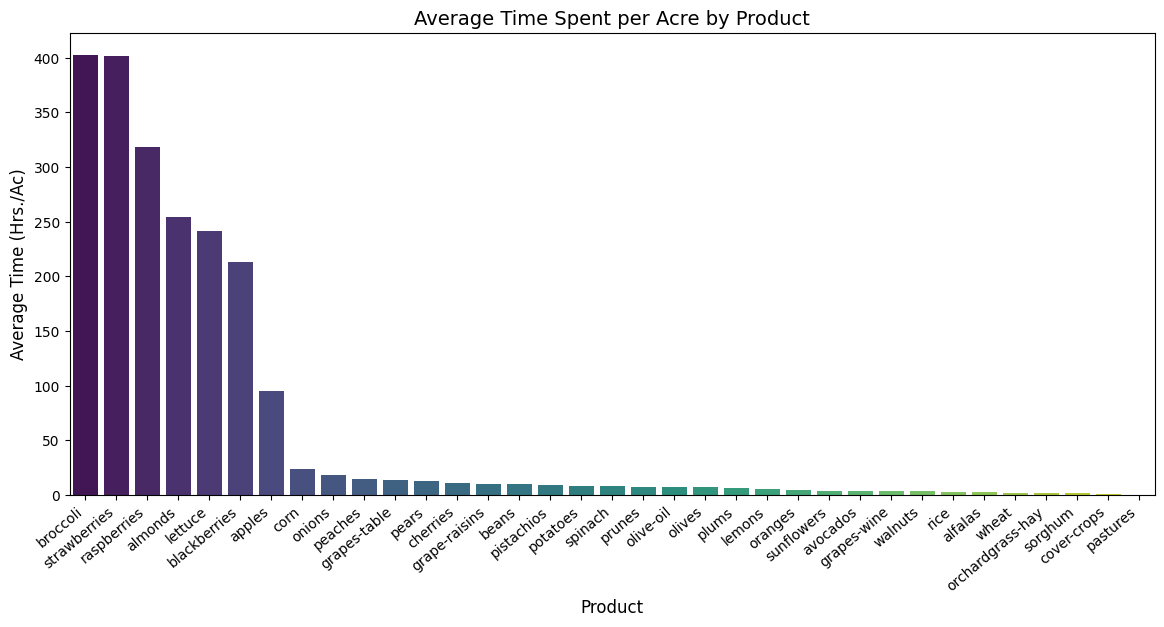

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

times_df = times_df.sort_values(by="Time (Hrs./Ac)", ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(x="Product", y="Time (Hrs./Ac)", data=times_df, palette="viridis")

plt.xlabel("Product", fontsize=12)
plt.ylabel("Average Time (Hrs./Ac)", fontsize=12)
plt.title("Average Time Spent per Acre by Product", fontsize=14)
plt.xticks(rotation=40, ha="right")  

plt.show()

/var/folders/xj/3_cf3p513dxgf8tbpc4j_1j40000gn/T/ipykernel_14607/2051888399.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product", y="Time (Hrs./Ac)", data=times_df, palette="viridis")


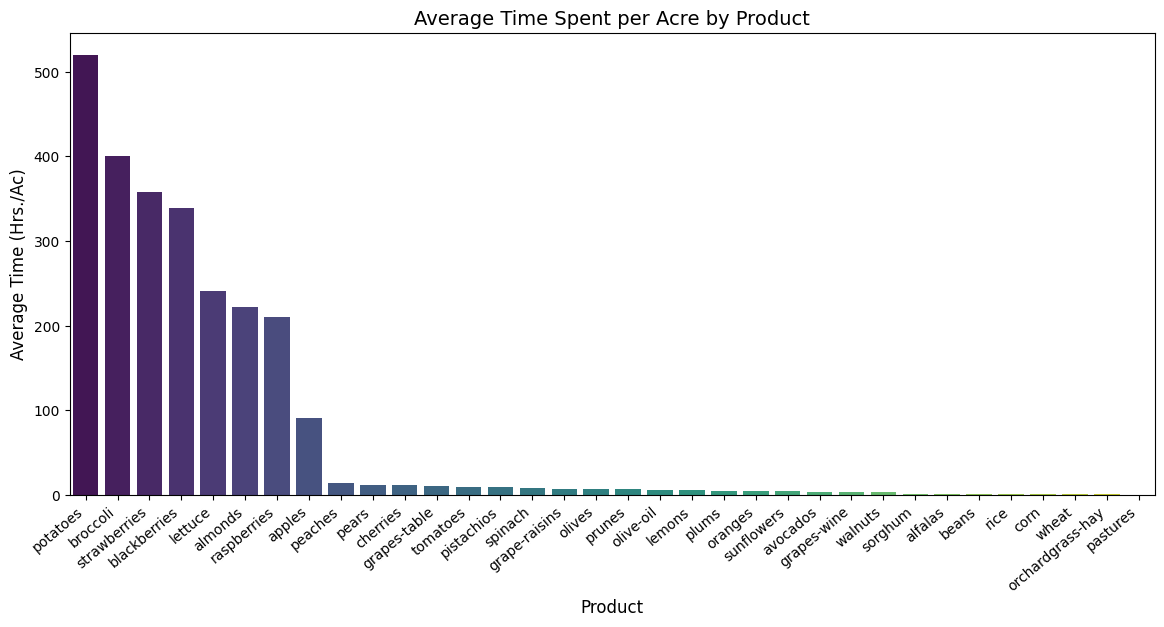

In [ ]:
# old data

import matplotlib.pyplot as plt
import seaborn as sns

times_df = times_df.sort_values(by="Time (Hrs./Ac)", ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(x="Product", y="Time (Hrs./Ac)", data=times_df, palette="viridis")

plt.xlabel("Product", fontsize=12)
plt.ylabel("Average Time (Hrs./Ac)", fontsize=12)
plt.title("Average Time Spent per Acre by Product", fontsize=14)
plt.xticks(rotation=40, ha="right")  

plt.show()

In [134]:
cost_df = filtered_df.groupby("Product", as_index=False)[["Labor Cost", "Total Cost"]].sum()


/var/folders/xj/3_cf3p513dxgf8tbpc4j_1j40000gn/T/ipykernel_14607/3691498515.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




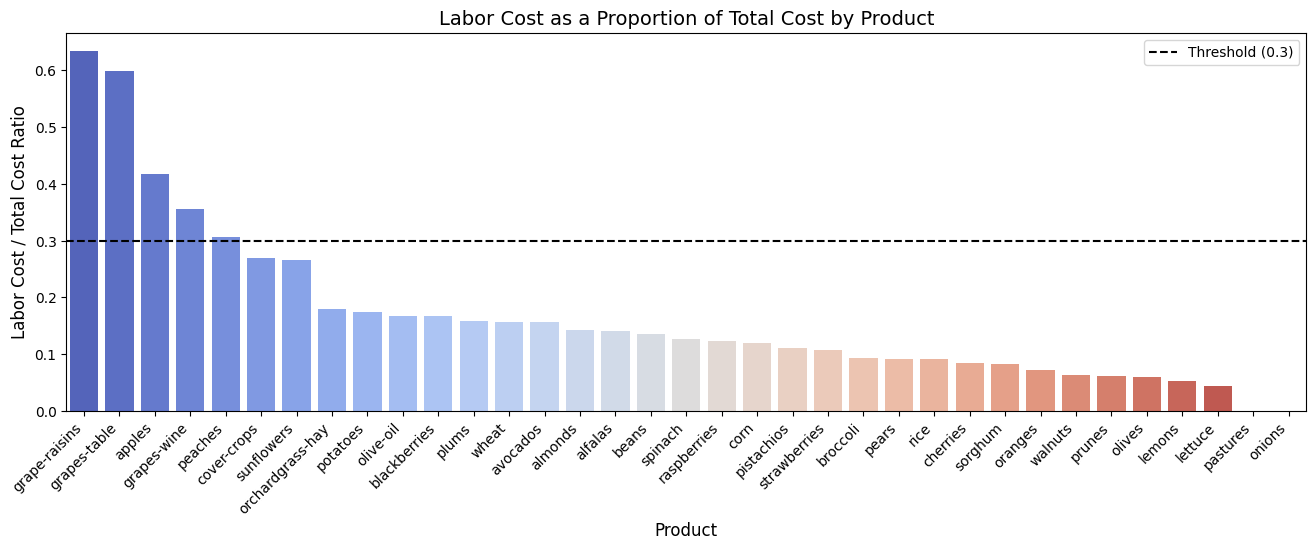

In [136]:
# new
import matplotlib.pyplot as plt
import seaborn as sns

cost_df["Ratio"] = cost_df["Labor Cost"] / cost_df["Total Cost"]
cost_df = cost_df.sort_values(by="Ratio", ascending=False)

plt.figure(figsize=(16, 6))
ax = sns.barplot(x="Product", y="Ratio", data=cost_df, palette="coolwarm")
plt.axhline(y=0.3, color='black', linestyle='dashed', linewidth=1.5, label="Threshold (0.3)")
plt.xticks(rotation=45, ha="right", fontsize=10)  
plt.subplots_adjust(bottom=0.25)  

plt.xlabel("Product", fontsize=12)
plt.ylabel("Labor Cost / Total Cost Ratio", fontsize=12)
plt.title("Labor Cost as a Proportion of Total Cost by Product", fontsize=14)
plt.legend()

plt.show()

/var/folders/xj/3_cf3p513dxgf8tbpc4j_1j40000gn/T/ipykernel_14607/2393409953.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Product", y="Ratio", data=cost_df, palette="coolwarm")


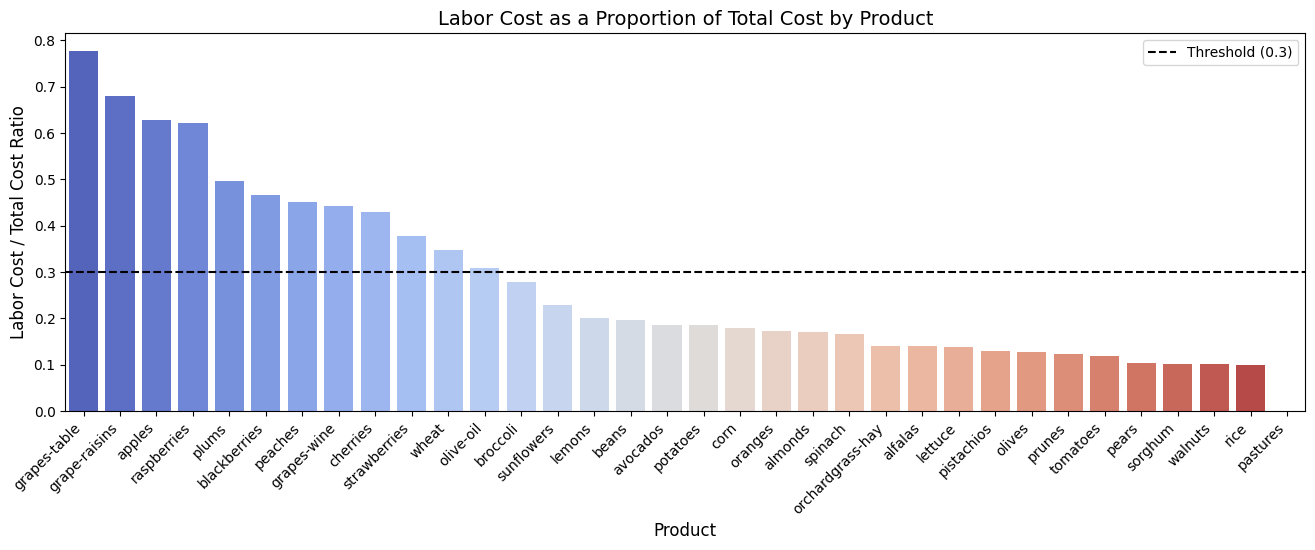

In [34]:
# old
import matplotlib.pyplot as plt
import seaborn as sns

cost_df["Ratio"] = cost_df["Labor Cost"] / cost_df["Total Cost"]
cost_df = cost_df.sort_values(by="Ratio", ascending=False)

plt.figure(figsize=(16, 6))
ax = sns.barplot(x="Product", y="Ratio", data=cost_df, palette="coolwarm")
plt.axhline(y=0.3, color='black', linestyle='dashed', linewidth=1.5, label="Threshold (0.3)")
plt.xticks(rotation=45, ha="right", fontsize=10)  
plt.subplots_adjust(bottom=0.25)  

plt.xlabel("Product", fontsize=12)
plt.ylabel("Labor Cost / Total Cost Ratio", fontsize=12)
plt.title("Labor Cost as a Proportion of Total Cost by Product", fontsize=14)
plt.legend()

plt.show()

In [35]:
#articles in full review that had mixed votes previously

In [137]:
cost_df
#come up with weighted score, including acrage per crop and stuff. production per state? indicators for labor intensiveness

#look into social deprivation index

#https://www.graham-center.org/maps-data-tools/social-deprivation-index.html
"""
https://www.graham-center.org/maps-data-tools/social-deprivation-index.html
    take a bunch of data (like %undereducated, % of ppl living in bad housing, unemployed%), normalize it
    Apply factor analysis (dimension reducing technique, look for latent variance between variables)
    factor analysis basically report a weight of importance, which we multiply with z score to find fianl
    


The idea is that
social deprivation -> undereducation, bad housing, enemployment, etc
    
However, social deprivation is more abstraction of an index, cannot be measured

So we look at quantifiable values we believe is associated with it

? -> undereducation, bad housing, enemployment, etc
Then we work backwards to find social deprivation


So something similar with this?

labor intensivity -> ratio of labor to machine/total cost, number of workers, worker compensation, workers per acre



then we work backwards

How could we apply this to farm labor?
    1. find variables associated with manual labor (assuming the latent)
    
#how labor intensive a states labor intensivity is?

ratio of cost: calculate with acrage of various crops per state
    
    
    
"""

'\nhttps://www.graham-center.org/maps-data-tools/social-deprivation-index.html\n    take a bunch of data (like %undereducated, % of ppl living in bad housing, unemployed%), normalize it\n    Apply factor analysis (dimension reducing technique, look for latent variance between variables)\n    factor analysis basically report a weight of importance, which we multiply with z score to find fianl\n    \n\n\nThe idea is that\nsocial deprivation -> undereducation, bad housing, enemployment, etc\n    \nHowever, social deprivation is more abstraction of an index, cannot be measured\n\nSo we look at quantifiable values we believe is associated with it\n\n? -> undereducation, bad housing, enemployment, etc\nThen we work backwards to find social deprivation\n\n\nSo something similar with this?\n\nlabor intensivity -> ratio of labor to machine/total cost, number of workers, worker compensation, workers per acre\n\n\n\nthen we work backwards\n\nHow could we apply this to farm labor?\n    1. find var

In [138]:
#read in xiaoyu's number of workers

In [139]:
data = {}
years = [2012, 2013, 2014, 2015, 2016 ,2017, 2018, 2019, 2020, 2021, 2022, 2023]
crop_to_products = {
    'GRAPES': ['grapes-table', 'grape-raisins', 'grapes-wine'],
    'APPLES': ['apples'],
    'GRAPES': ['grapes-table', 'grape-raisins', 'grapes-wine'],
    'RASPBERRIES': ['raspberries'],
    'PLUMS': ['plums'],
    'BLACKBERRIES': ['blackberries'],
    'PEACHES': ['peaches'],
    'CHERRIES': ['cherries'],
    'WHEAT': ['wheat'],
    'OLIVES': ['olives', 'olive-oil'],
    'BROCCOLI': ['broccoli'],
    'SUNFLOWER': ['sunflowers'],
    'LEMONS': ['lemons'],
    'BEANS': ['beans'],
    'AVOCADOS': ['avocados'],
    'POTATOES': ['potatoes'],
    'CORN': ['corn'],
    'ORANGES': ['oranges'],
    'ALMONDS': ['almonds'],
    'SPINACH': ['spinach'],
    'LETTUCE': ['lettuce'],
    'PISTACHIOS': ['pistachios'],
    'PRUNES': ['prunes'],
    'TOMATOES': ['tomatoes'],
    'PEARS': ['pears'],
    'SORGHUM': ['sorghum'],
    'WALNUTS': ['walnuts'],
    'RICE': ['rice']
}
columns_to_keep = ['state_name'] + list(crop_to_products.keys())


for year in years:
    df = pd.read_csv(f"../USDAstats/norm-data/{year}_summed.csv")
    filtered_columns = [col for col in columns_to_keep if col in df.columns]
    data[year] = df[filtered_columns]

In [140]:
"""perennial crops: live and produce for multiple years
annual crops: replanted every year

we should use area bearing for perennial crops,
and area harvested for annual crops
"""



crop_lifecycle = {
    'GRAPES': 'perennial',
    'APPLES': 'perennial',
    'RASPBERRIES': 'perennial',
    'PLUMS': 'perennial',
    'BLACKBERRIES': 'perennial',
    'PEACHES': 'perennial',
    'CHERRIES': 'perennial',
    'WHEAT': 'annual',
    'OLIVES': 'perennial',
    'BROCCOLI': 'annual',
    'SUNFLOWER': 'annual',
    'LEMONS': 'perennial',
    'BEANS': 'annual',
    'AVOCADOS': 'perennial',
    'POTATOES': 'annual',
    'CORN': 'annual',
    'ORANGES': 'perennial',
    'ALMONDS': 'perennial',
    'SPINACH': 'annual',
    'LETTUCE': 'annual',
    'PISTACHIOS': 'perennial',
    'PRUNES': 'perennial',
    'TOMATOES': 'annual',
    'PEARS': 'perennial',
    'SORGHUM': 'annual',
    'WALNUTS': 'perennial',
    'RICE': 'annual'
}


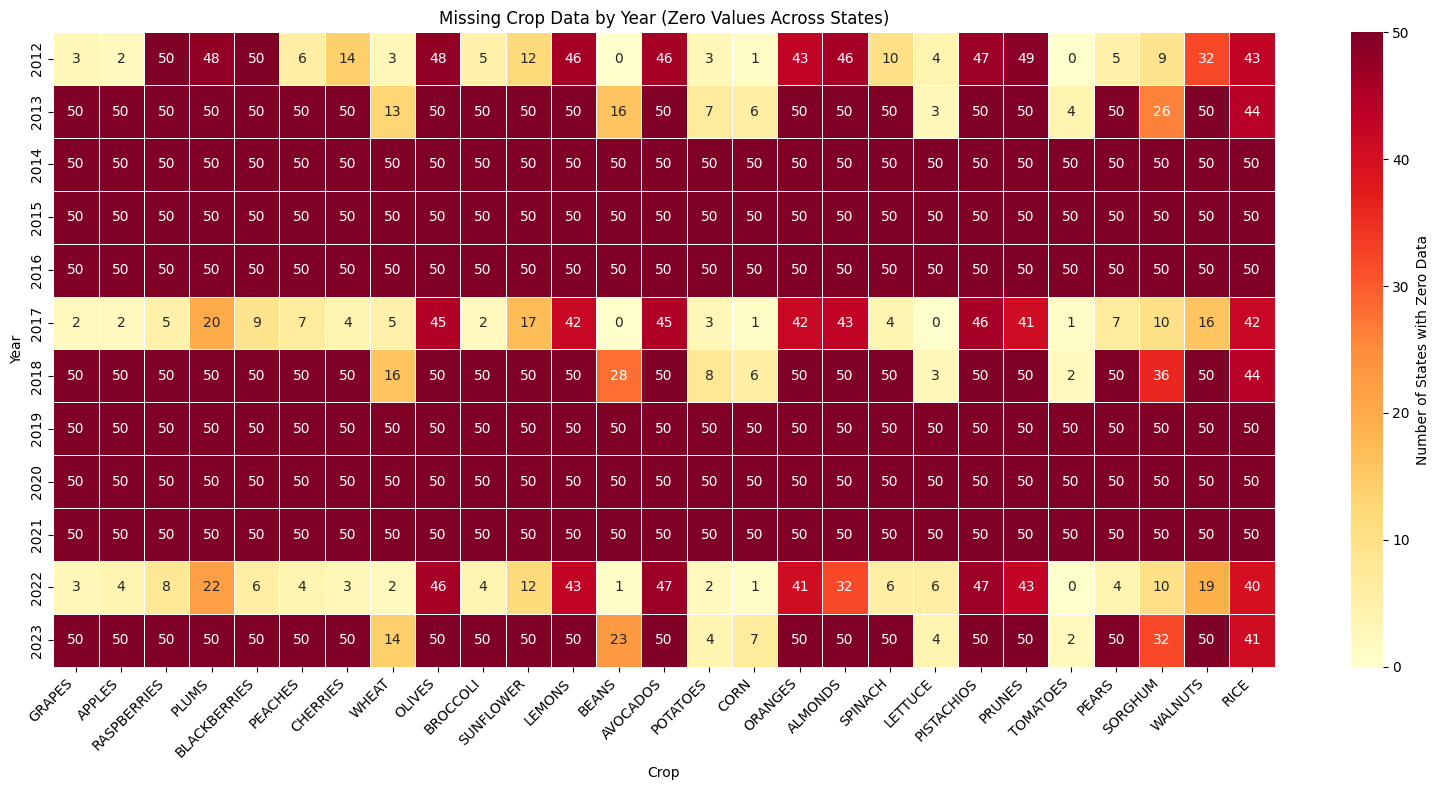

In [141]:
missing_counts = {}

for year, df in data.items():
    df = df.copy()

    # If df is empty, simulate 50 rows (1 per state) with zeros
    if df.empty:
        df = pd.DataFrame(columns=columns_to_keep)
        df['state_name'] = [f'State {i+1}' for i in range(50)]  # Placeholder state names
        for col in columns_to_keep:
            if col != 'state_name':
                df[col] = 0
    else:
        # Ensure all expected columns are present
        for col in columns_to_keep:
            if col not in df.columns:
                df[col] = 0

    # Keep only the relevant columns
    df = df[columns_to_keep]

    # Count zero values per crop (excluding 'state_name')
    zero_counts = (df.drop(columns='state_name') == 0).sum()
    missing_counts[year] = zero_counts

# Continue as before...
missing_df = pd.DataFrame(missing_counts).T
missing_df = missing_df.loc[:, missing_df.sum().sort_values(ascending=False).index]
missing_df = missing_df.fillna(0).astype(int)

# Reorder and plot
ordered_crops = list(crop_to_products.keys())
missing_df = missing_df[ordered_crops]

plt.figure(figsize=(16, 8))
sns.heatmap(
    missing_df,
    cmap='YlOrRd',
    annot=True,
    fmt='d',
    linewidths=0.5,
    cbar_kws={'label': 'Number of States with Zero Data'}
)
plt.title("Missing Crop Data by Year (Zero Values Across States)")
plt.xlabel("Crop")
plt.ylabel("Year")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [142]:
current_data = data[2022]

In [143]:
cost_df = cost_df.drop(index =9)
cost_df = cost_df.drop(index = 11)

In [144]:
crop_to_products = {
    'GRAPES': ['grapes-table', 'grape-raisins', 'grapes-wine'],
    'APPLES': ['apples'],
    'GRAPES': ['grapes-table', 'grape-raisins', 'grapes-wine'],
    'RASPBERRIES': ['raspberries'],
    'PLUMS': ['plums'],
    'BLACKBERRIES': ['blackberries'],
    'PEACHES': ['peaches'],
    'CHERRIES': ['cherries'],
    'WHEAT': ['wheat'],
    'OLIVES': ['olives', 'olive-oil'],
    'BROCCOLI': ['broccoli'],
    'SUNFLOWER': ['sunflowers'],
    'LEMONS': ['lemons'],
    'BEANS': ['beans'],
    'AVOCADOS': ['avocados'],
    'POTATOES': ['potatoes'],
    'CORN': ['corn'],
    'ORANGES': ['oranges'],
    'ALMONDS': ['almonds'],
    'SPINACH': ['spinach'],
    'LETTUCE': ['lettuce'],
    'PISTACHIOS': ['pistachios'],
    'PRUNES': ['prunes'],
    'TOMATOES': ['tomatoes'],
    'PEARS': ['pears'],
    'SORGHUM': ['sorghum'],
    'WALNUTS': ['walnuts'],
    'RICE': ['rice']
}

In [145]:
product_to_crop = {
    product: crop
    for crop, products in crop_to_products.items()
    for product in products
}

# Map the Product column to Crop
cost_df['Crop'] = cost_df['Product'].map(product_to_crop)

In [146]:
transform_data = current_data.copy()

for _, row in cost_df.iterrows():
    crop = row['Crop']
    ratio = row['Ratio']
    
    if crop in transform_data.columns:
        transform_data[crop] *= ratio

transform_data['total_value'] = transform_data.drop(columns='state_name').sum(axis=1)


In [147]:
import plotly.io as pio

pio.renderers.default = 'browser'
state_abbrev = {
    'ALABAMA': 'AL', 'ALASKA': 'AK', 'ARIZONA': 'AZ', 'ARKANSAS': 'AR',
    'CALIFORNIA': 'CA', 'COLORADO': 'CO', 'CONNECTICUT': 'CT', 'DELAWARE': 'DE',
    'FLORIDA': 'FL', 'GEORGIA': 'GA', 'HAWAII': 'HI', 'IDAHO': 'ID', 'ILLINOIS': 'IL',
    'INDIANA': 'IN', 'IOWA': 'IA', 'KANSAS': 'KS', 'KENTUCKY': 'KY', 'LOUISIANA': 'LA',
    'MAINE': 'ME', 'MARYLAND': 'MD', 'MASSACHUSETTS': 'MA', 'MICHIGAN': 'MI',
    'MINNESOTA': 'MN', 'MISSISSIPPI': 'MS', 'MISSOURI': 'MO', 'MONTANA': 'MT',
    'NEBRASKA': 'NE', 'NEVADA': 'NV', 'NEW HAMPSHIRE': 'NH', 'NEW JERSEY': 'NJ',
    'NEW MEXICO': 'NM', 'NEW YORK': 'NY', 'NORTH CAROLINA': 'NC', 'NORTH DAKOTA': 'ND',
    'OHIO': 'OH', 'OKLAHOMA': 'OK', 'OREGON': 'OR', 'PENNSYLVANIA': 'PA',
    'RHODE ISLAND': 'RI', 'SOUTH CAROLINA': 'SC', 'SOUTH DAKOTA': 'SD', 'TENNESSEE': 'TN',
    'TEXAS': 'TX', 'UTAH': 'UT', 'VERMONT': 'VT', 'VIRGINIA': 'VA', 'WASHINGTON': 'WA',
    'WEST VIRGINIA': 'WV', 'WISCONSIN': 'WI', 'WYOMING': 'WY'
}
transform_data['state_code'] = transform_data['state_name'].map(state_abbrev)

# Drop rows where state_code is missing (just in case)
transform_data = transform_data.dropna(subset=['state_code'])

# Create choropleth
fig = px.choropleth(
    transform_data,
    locations='state_code',
    locationmode="USA-states",
    color='total_value',
    scope="usa",
    color_continuous_scale=[[0, 'white'], [1, 'red']],  # or 'Blues', 'Reds', 'Plasma', etc.
    labels={'total_value': 'Total Value'},
    title="Acrage * Labor cost ratio in the united states"
)

fig.show()

In [148]:
transform_data['normalzied_value'] = transform_data['total_value'] /  current_data.drop(columns='state_name').sum(axis=1)


In [149]:
#normalized by total acrage

# Create choropleth
fig = px.choropleth(
    transform_data,
    locations='state_code',
    locationmode="USA-states",
    color='normalzied_value',
    scope="usa",
    color_continuous_scale=[[0, 'white'], [1, 'red']],  # or 'Blues', 'Reds', 'Plasma', etc.
    labels={'normalzied_value': 'Total Value'},
    title="Acrage * Labor cost ratio in the united states"
)

fig.show()

In [97]:
transform_data.columns

Index(['state_name', 'GRAPES', 'APPLES', 'RASPBERRIES', 'PLUMS',
       'BLACKBERRIES', 'PEACHES', 'CHERRIES', 'WHEAT', 'OLIVES', 'BROCCOLI',
       'SUNFLOWER', 'LEMONS', 'BEANS', 'AVOCADOS', 'POTATOES', 'CORN',
       'ORANGES', 'ALMONDS', 'SPINACH', 'LETTUCE', 'PISTACHIOS', 'PRUNES',
       'TOMATOES', 'PEARS', 'SORGHUM', 'WALNUTS', 'RICE', 'total_value',
       'state_code', 'normalzied_value'],
      dtype='object')

In [102]:
no_corn_wheat.columns

Index(['state_name', 'GRAPES', 'APPLES', 'RASPBERRIES', 'PLUMS',
       'BLACKBERRIES', 'PEACHES', 'CHERRIES', 'OLIVES', 'BROCCOLI',
       'SUNFLOWER', 'LEMONS', 'BEANS', 'AVOCADOS', 'POTATOES', 'ORANGES',
       'ALMONDS', 'SPINACH', 'LETTUCE', 'PISTACHIOS', 'PRUNES', 'TOMATOES',
       'PEARS', 'SORGHUM', 'WALNUTS', 'RICE', 'state_code'],
      dtype='object')

In [150]:
#normalized by total acrage
no_corn_wheat = transform_data.drop(['CORN', 'WHEAT', 'total_value', 'normalzied_value'], axis=1)
no_corn_wheat['total_value'] = no_corn_wheat.drop(columns=['state_name', 'state_code']).sum(axis=1)
no_corn_wheat['normalzied_value'] = no_corn_wheat['total_value'] /  current_data.drop(columns=['state_name', 'CORN', 'WHEAT']).sum(axis=1)



# Create choropleth
fig = px.choropleth(
    no_corn_wheat,
    locations='state_code',
    locationmode="USA-states",
    color='total_value',
    scope="usa",
    color_continuous_scale=[[0, 'white'], [1, 'red']],  # or 'Blues', 'Reds', 'Plasma', etc.
    labels={'normalzied_value': 'Total Value'},
    title="Acrage * Labor cost ratio in the united states, no corn or wheat"
)

fig.show()

In [151]:
# Create choropleth
fig = px.choropleth(
    no_corn_wheat,
    locations='state_code',
    locationmode="USA-states",
    color='normalzied_value',
    scope="usa",
    color_continuous_scale=[[0, 'white'], [1, 'red']],  # or 'Blues', 'Reds', 'Plasma', etc.
    labels={'normalzied_value': 'Total Value'},
    title="Acrage * Labor cost ratio in the united states, no corn or wheat, normalized for acrage"
)

fig.show()

In [ ]:
"""
What is next?

run factor analysis on the following variables
1. lobor - total cost ratio by crop, multiplied with acrage per state
2. inverse mechanization index per state
3. labor hour - acrage ratio by crop, multiplied by acrage per state
4. H2A worker count per state

total cultural costs, total operation/acre costs, or harvest cost?


"""